# Лабораторная работа 2

### Выполнил: Яловега Н. гр. 9308



---



# Предварительный анализ данных

## Импорт необходимых библиотек

In [102]:
import warnings
warnings.filterwarnings('always')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
from imblearn.over_sampling import SMOTE
%matplotlib inline

le = preprocessing.LabelEncoder()



---



## Загрузка данных в датафрейм

Так как наш набор данных в формате csv, прочитаем его следующей функцией в pandas

In [103]:
df = pd.read_csv("master.csv") 
df.head()               

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Проверка типов данных

Здесь мы проверяем типы данных, потому что иногда цена автомобиля хранится в виде строки, поэтому следует преобразовать эту строку в целочисленные данные, только тогда возможно отобразить данные на графике. В данном случае данные уже представлены в целочисленном формате, поэтому беспокоиться не о чем.

In [104]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object



---



## Удаление нерелевантных колонок

In [105]:
df = df.drop(['country-year', 'age'], axis=1)
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,NaN,"2,156,624,900",796,Boomers




---



## Переименование столбцов

В данном случае большинство названий столбцов нечитаемы, поэтому переименуем их.

In [106]:
df = df.rename(columns={" gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp_per_capita"})
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,NaN,"2,156,624,900",796,Boomers




---



## Удаление дубликатов

Большой набор данных (более 10 000 строк), часто может содержать в себе дубликаты. Например, до удаления в данном наборе было 11914 строк данных, а после удаления дубликатов 10925, таким образом набор данных содержал 989 строк дубликатов.

In [107]:
df.shape

(27820, 10)

In [108]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4, 10)


In [109]:
df.count()      # Used to count the number of rows

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
HDI for year          8364
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

In [110]:
df = df.drop(['HDI for year'], axis = 1)
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,"2,156,624,900",796,Boomers


In [111]:
df.count()

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

## Удаление пропусков

Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются.

In [112]:
print(df.isnull().sum())

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64


In [113]:
df = df.dropna()    # Dropping the missing values.
df.count()

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

Удалили все строки с пропущенными значениями (Restaurent Type и SectionViolations).

In [114]:
print(df.isnull().sum())   # After dropping the values

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64


## Замена категориальных переменных

In [115]:
df.dtypes

country               object
year                   int64
sex                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [116]:
df['gdp_for_year'].value_counts()


2,156,624,900      12
96,045,645,026     12
27,116,635,600     12
29,440,287,600     12
34,686,224,300     12
                   ..
390,799,991,147    10
51,338,524,831     10
125,816,640,421    10
10,546,135,160     10
11,183,458,131     10
Name: gdp_for_year, Length: 2321, dtype: int64

In [117]:
trim = lambda ss: ''.join(s for s in ss if s.isdigit())
to_int = lambda kk: int(kk)

df['gdp_for_year'] = df['gdp_for_year'].apply(trim)
df['gdp_for_year'] = df['gdp_for_year'].apply(to_int)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,2156624900,796,Boomers


In [118]:
df['country'] = le.fit_transform(df['country'])
df['country'].value_counts()

57    382
6     382
61    382
41    382
15    372
     ... 
14     24
17     12
27     12
54     12
59     10
Name: country, Length: 101, dtype: int64

In [119]:
df['generation'] = le.fit_transform(df['generation'])
df['generation'].value_counts()

2    6408
5    6364
4    5844
0    4990
1    2744
3    1470
Name: generation, dtype: int64

In [120]:
df.dtypes

country                int64
year                   int64
sex                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year           int64
gdp_per_capita         int64
generation             int64
dtype: object

In [121]:
num_replace = {'sex': {'male': 0, 'female': 1}}

df = df.replace(num_replace)

df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,0,21,312900,6.71,2156624900,796,2
1,0,1987,0,16,308000,5.19,2156624900,796,5
2,0,1987,1,14,289700,4.83,2156624900,796,2
3,0,1987,0,1,21800,4.59,2156624900,796,1
4,0,1987,0,9,274300,3.28,2156624900,796,0




---



## Определение выбросов

Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами". На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы.

In [122]:
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,0,21,312900,6.71,2156624900,796,2
1,0,1987,0,16,308000,5.19,2156624900,796,5
2,0,1987,1,14,289700,4.83,2156624900,796,2
3,0,1987,0,1,21800,4.59,2156624900,796,1
4,0,1987,0,9,274300,3.28,2156624900,796,0


2.0


<AxesSubplot:xlabel='generation'>

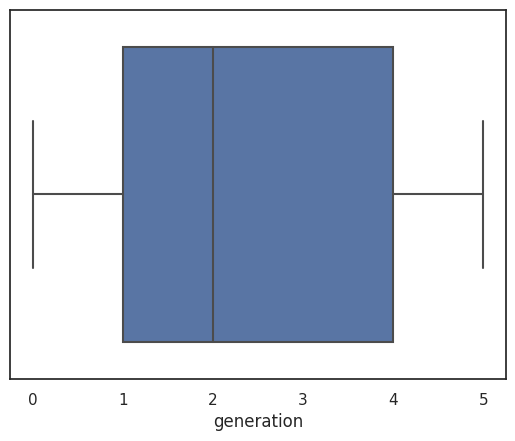

In [123]:
print(df['generation'].median())
sns.boxplot(x=df['generation'])

In [124]:
columns_int = df.select_dtypes(include=["int64", "float64"])

In [125]:
for x in columns_int:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [126]:
df.isnull().sum()

country                 0
year                    0
sex                     0
suicides_no          3909
population           4180
suicides/100k pop    2046
gdp_for_year         3586
gdp_per_capita       1016
generation              0
dtype: int64

In [127]:
df = df.dropna()
df.isnull().sum()

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64



---



## Нормализация данных

In [128]:
cdf = df.copy()
buff = cdf["generation"]
cdf = (df - df.min())/(df.max() - df.min())
del cdf["generation"]
cdf.insert(0, "generation", buff)
scaled_df = cdf

In [129]:
scaled_df

,generation,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita
0,2.0,0.0,0.064516,0.0,0.065015,0.087605,0.167082,0.003332,0.009632
1,5.0,0.0,0.064516,0.0,0.049536,0.086232,0.129233,0.003332,0.009632
2,2.0,0.0,0.064516,1.0,0.043344,0.081104,0.120269,0.003332,0.009632
3,1.0,0.0,0.064516,0.0,0.003096,0.006031,0.114293,0.003332,0.009632
4,0.0,0.0,0.064516,0.0,0.027864,0.076789,0.081673,0.003332,0.009632
...,...,...,...,...,...,...,...,...,...
27814,4.0,1.0,0.935484,1.0,0.501548,0.766413,0.147410,0.099535,0.036372
27816,5.0,1.0,0.935484,1.0,0.027864,0.097572,0.064243,0.099535,0.036372
27817,3.0,1.0,0.935484,0.0,0.185759,0.773956,0.054034,0.099535,0.036372
27818,3.0,1.0,0.935484,1.0,0.136223,0.737370,0.041584,0.099535,0.036372


In [130]:
scaled_df['generation'].value_counts()

2.0    4626
4.0    4289
5.0    4258
0.0    3267
1.0    1949
3.0    1018
Name: generation, dtype: int64

## Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты.

<AxesSubplot:>

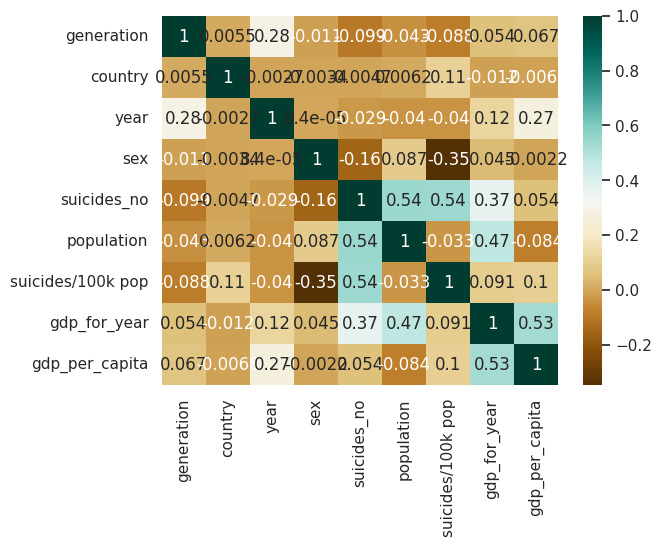

In [131]:
sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

<AxesSubplot:>

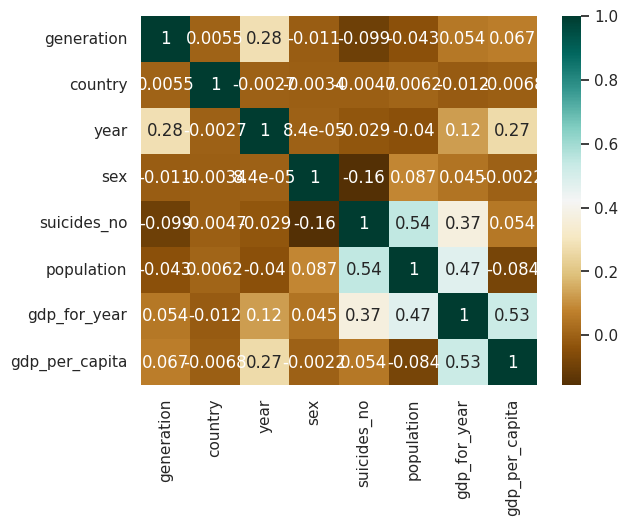

In [132]:
df = df.drop(columns=["suicides/100k pop"])

cdf = df.copy()
buff = cdf["generation"]
cdf = (df - df.min())/(df.max() - df.min())
del cdf["generation"]
cdf.insert(0, "generation", buff)
scaled_df = cdf

sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

# Кластеризация

Задача состоит в том, чтобы разделить данные на группы по поколению. Для этого мы должны удалить столбец 'generation' из набора данных.

## PCA

In [133]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd 
sns.set(style="white")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition
from imblearn.over_sampling import SMOTE

In [134]:
data_final = scaled_df

X = data_final.loc[:, data_final.columns != 'generation']
y = df.loc[:, df.columns == 'generation']

In [135]:
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [136]:
y

,generation
0,2.0
1,5.0
2,2.0
3,1.0
4,0.0
...,...
27751,5.0
27752,5.0
27753,5.0
27754,5.0


In [137]:
pd.DataFrame(X)

,country,year,sex,suicides_no,population,gdp_for_year,gdp_per_capita
0,0.000000,0.064516,0.0,0.065015,0.087605,0.003332,0.009632
1,0.000000,0.064516,0.0,0.049536,0.086232,0.003332,0.009632
2,0.000000,0.064516,1.0,0.043344,0.081104,0.003332,0.009632
3,0.000000,0.064516,0.0,0.003096,0.006031,0.003332,0.009632
4,0.000000,0.064516,0.0,0.027864,0.076789,0.003332,0.009632
...,...,...,...,...,...,...,...
27751,0.080000,0.435507,1.0,0.000000,0.004059,0.011391,0.484165
27752,0.720201,0.561745,0.0,0.627355,0.259724,0.168833,0.195483
27753,0.510000,0.716015,1.0,0.083591,0.032576,0.050189,0.264927
27754,0.080000,0.484743,0.0,0.000000,0.003564,0.012692,0.524829


In [138]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred.round(0)))

              precision    recall  f1-score   support

         0.0       0.50      0.58      0.53      1387
         1.0       0.83      0.87      0.85      1388
         2.0       0.51      0.47      0.49      1388
         3.0       0.86      0.97      0.91      1388
         4.0       0.60      0.67      0.64      1388
         5.0       0.71      0.46      0.56      1388

    accuracy                           0.67      8327
   macro avg       0.67      0.67      0.66      8327
weighted avg       0.67      0.67      0.66      8327



In [139]:
pca = decomposition.PCA(n_components=7)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [140]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )

1 component: 43.79% of initial variance
2 component: 17.01% of initial variance
3 component: 14.47% of initial variance
4 component: 11.84% of initial variance
5 component: 8.29% of initial variance
6 component: 2.96% of initial variance
7 component: 1.64% of initial variance


Можем заметить, что каждый столбец важный (относительно дисперсии)

In [141]:
pca = decomposition.PCA(n_components=6)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [142]:
# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, stratify=y, random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred.round(0)))

              precision    recall  f1-score   support

         0.0       0.41      0.34      0.37      1387
         1.0       0.53      0.80      0.64      1388
         2.0       0.44      0.28      0.34      1388
         3.0       0.67      0.93      0.78      1388
         4.0       0.51      0.44      0.47      1388
         5.0       0.41      0.31      0.35      1388

    accuracy                           0.52      8327
   macro avg       0.49      0.52      0.49      8327
weighted avg       0.49      0.52      0.49      8327



Видим заметное ухудшение работы алгоритма

## K-means

In [143]:
data_final = scaled_df

X = data_final.loc[:, data_final.columns != 'generation']
y = df.loc[:, df.columns == 'generation']

In [144]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

kmeans = KMeans(n_clusters = 6, random_state = 5051)

kmeans.fit(X)

KMeans(n_clusters=6, random_state=5051)


Silhouette score: 0.02325470180435042



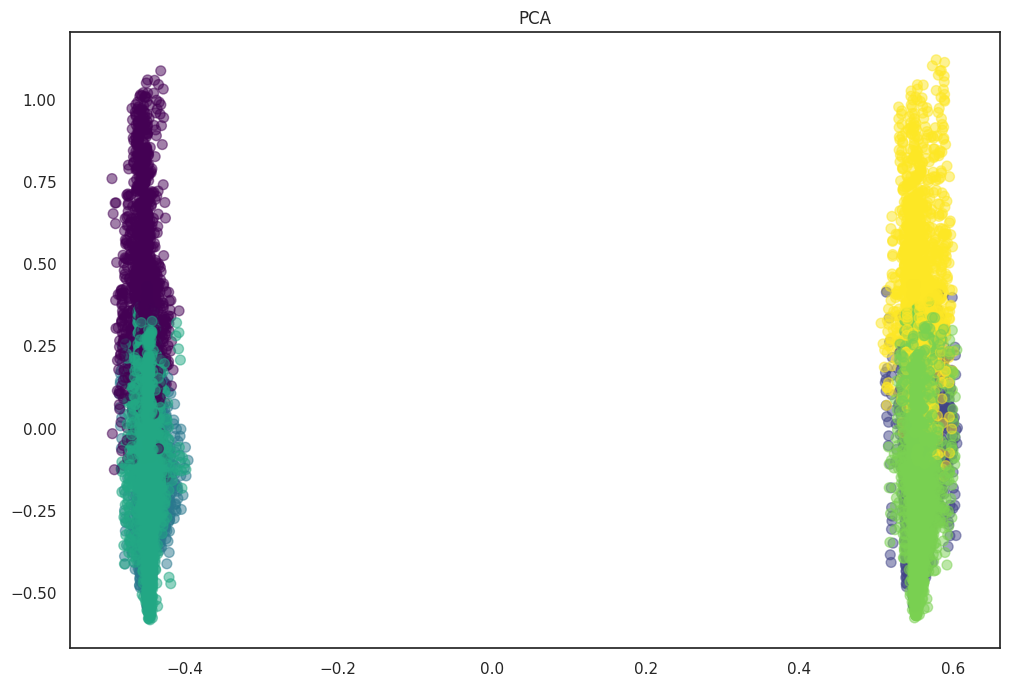

In [145]:
# ПОЛУЧЕННЫЕ ЗНАЧЕНИЯ
# Visualizing using PCA
pca = PCA(n_components = 6)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis', alpha = 0.5)
plt.title('PCA')

print(f"\nSilhouette score: {metrics.silhouette_score(data_final, kmeans.labels_)}\n") 

Text(0.5, 1.0, 'PCA')

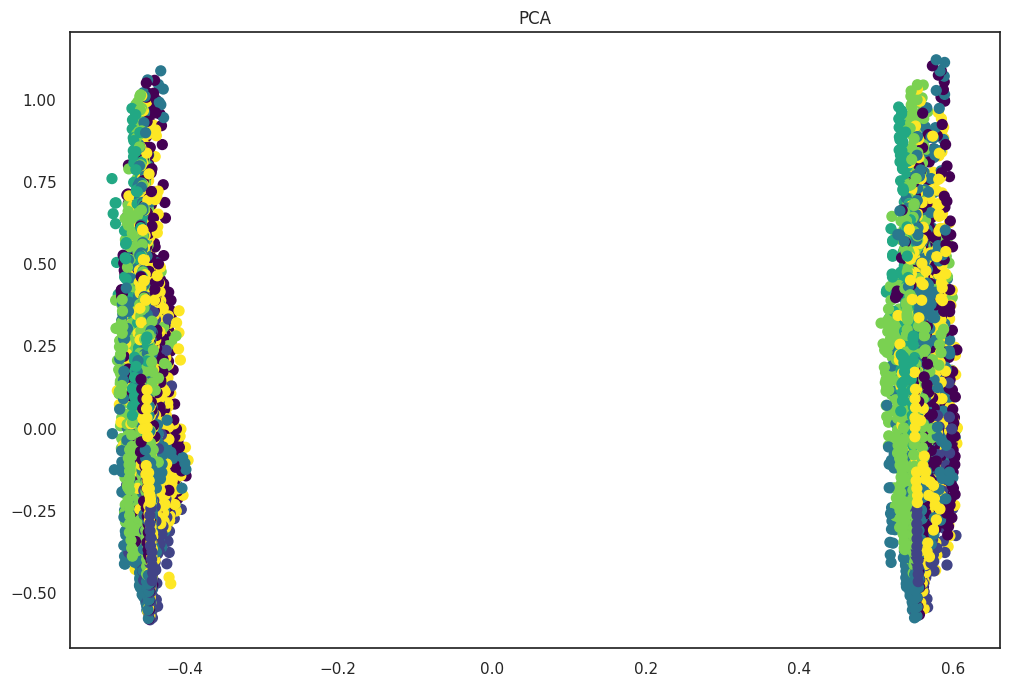

In [146]:
# РЕАЛЬНЫЕ ЗНАЧЕНИЯ
# Visualizing using PCA
pca = PCA(n_components=6)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y.to_numpy(), s=50, cmap='viridis')
plt.title('PCA')

In [147]:
scaled_df['generation'].value_counts()

2.0    4626
4.0    4289
5.0    4258
0.0    3267
1.0    1949
3.0    1018
Name: generation, dtype: int64

In [148]:
# import itertools

# labels = pd.DataFrame(kmeans.labels_)
# labels = labels.rename(columns = {0: 'Assessment_Results'})

# combinations = list(itertools.permutations([2, 4, 5, 0, 1, 3]))

# for i in combinations:
#     num_replace = {'Assessment_Results': {0: i[0], 1: i[1], 2: i[2], 3: i[3], 4: i[4], 5: i[5]}}
#     print((labels.replace(num_replace) - y).value_counts())

## DBSCAN

In [149]:
from sklearn.cluster import DBSCAN

In [150]:
x_t = X.copy()

for eps_i_int in range(10, 35, 5):
    eps_i = eps_i_int / 100
    for min_samples_i in range(3, 9, 2):
        dbscan = DBSCAN(eps = eps_i, min_samples = min_samples_i).fit(x_t)
        number_of_class = len(set(dbscan.labels_))
        print(f"eps = {eps_i}; min_samples = {min_samples_i}: {number_of_class} classes")
        if(number_of_class < 6):
            d = defaultdict(lambda:0)
            for row_i in dbscan.labels_:
                d[row_i] += 1
            print(f"\t{d}")

eps = 0.1; min_samples = 3: 483 classes
eps = 0.1; min_samples = 5: 314 classes
eps = 0.1; min_samples = 7: 138 classes
eps = 0.15; min_samples = 3: 146 classes
eps = 0.15; min_samples = 5: 126 classes
eps = 0.15; min_samples = 7: 107 classes
eps = 0.2; min_samples = 3: 59 classes
eps = 0.2; min_samples = 5: 46 classes
eps = 0.2; min_samples = 7: 45 classes
eps = 0.25; min_samples = 3: 16 classes
eps = 0.25; min_samples = 5: 16 classes
eps = 0.25; min_samples = 7: 15 classes
eps = 0.3; min_samples = 3: 8 classes
eps = 0.3; min_samples = 5: 8 classes
eps = 0.3; min_samples = 7: 7 classes


In [151]:
dbscan = DBSCAN(eps = 0.3, min_samples=7).fit(X)

Text(0.5, 1.0, 'PCA')

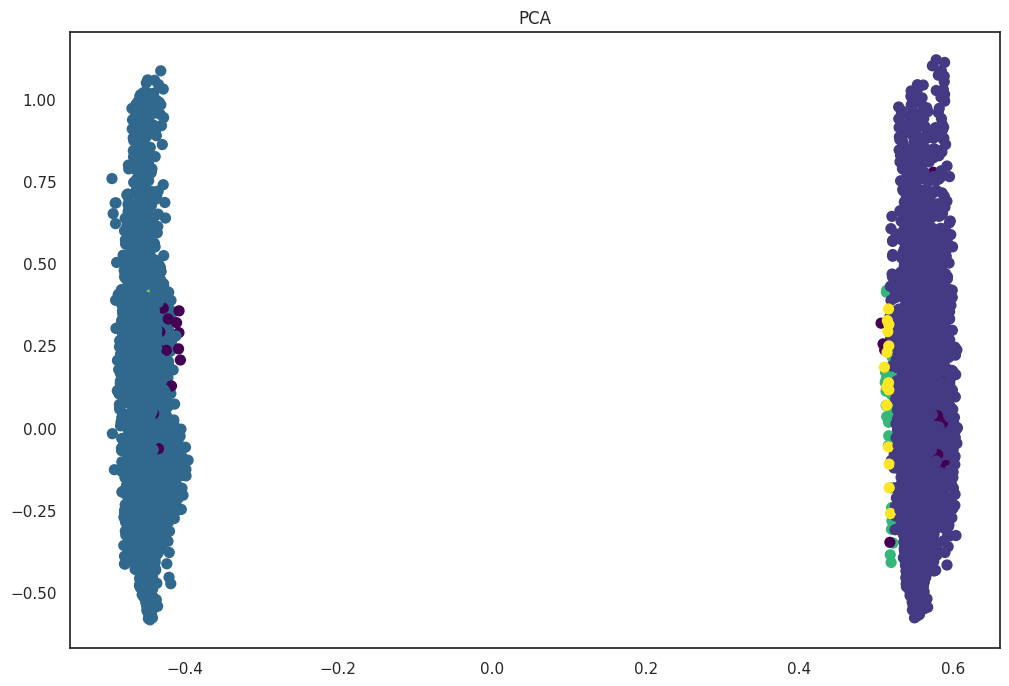

In [152]:
# Visualizing using PCA
pca = PCA(n_components=7)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=dbscan.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [153]:
# ПРИДУМАННЫЕ КЛАСТЕРЫ
labels = pd.DataFrame(dbscan.labels_)
labels.value_counts()

 1    10684
 0     8565
 2       60
-1       40
 3       27
 4       16
 5       15
dtype: int64

In [154]:
print(f"\nSilhouette score: {metrics.silhouette_score(data_final, dbscan.labels_)}\n") 


Silhouette score: -0.19910742572897622



Можем сделать вывод, что большинство точек находятся рядом с друг другом

## Agglomerative clustering

In [155]:
from sklearn.cluster import AgglomerativeClustering

In [156]:
data_final = scaled_df
data_final['generation'] = df.loc[:, df.columns == 'generation']
data_final = data_final.sample(frac = 0.1)
X = data_final.loc[:, data_final.columns != 'generation']
y = data_final.loc[:, df.columns == 'generation']

In [157]:
agglomerative = AgglomerativeClustering(n_clusters = 6).fit(X)

Text(0.5, 1.0, 'PCA')

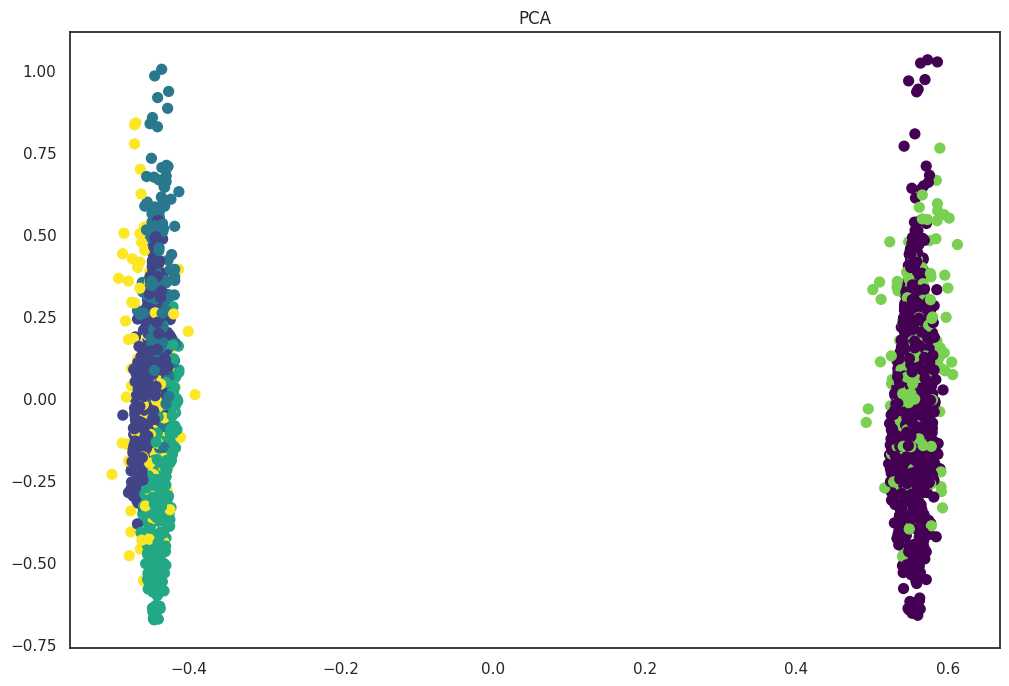

In [158]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=agglomerative.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [159]:
print(f"\nSilhouette score: {metrics.silhouette_score(data_final, agglomerative.labels_)}\n") 


Silhouette score: 0.019217161391067456



## Mean-shift

In [160]:
from sklearn.cluster import MeanShift

In [161]:
data_final = scaled_df
data_final['generation'] = df.loc[:, df.columns == 'generation']
data_final = data_final.sample(frac = 0.1)
X = data_final.loc[:, data_final.columns != 'generation']
y = data_final.loc[:, df.columns == 'generation']

In [164]:
shift = MeanShift().fit(X)

In [165]:
pd.DataFrame(shift.labels_).value_counts()

0    1076
1     865
dtype: int64

Text(0.5, 1.0, 'PCA')

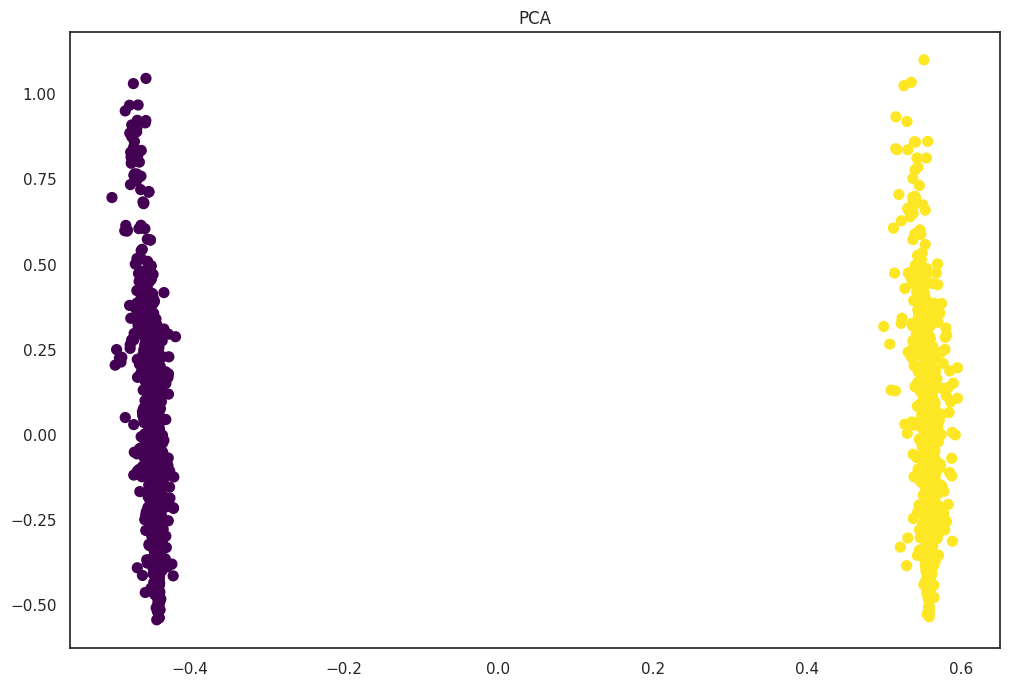

In [166]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=shift.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [167]:
print(f"\nSilhouette score: {metrics.silhouette_score(data_final, shift.labels_)}\n") 


Silhouette score: 0.11276009504547718



## EM

In [168]:
from sklearn.mixture import GaussianMixture

In [169]:
data_final = scaled_df
data_final['generation'] = df.loc[:, df.columns == 'generation']
X = data_final.loc[:, data_final.columns != 'generation']
y = data_final.loc[:, df.columns == 'generation']

In [170]:
y

,gdp_per_capita
0,0.009632
1,0.009632
2,0.009632
3,0.009632
4,0.009632
...,...
27814,0.036372
27816,0.036372
27817,0.036372
27818,0.036372


In [171]:
gm = GaussianMixture(n_components=6, random_state=0).fit(X)

In [172]:
pd.DataFrame(gm.predict(X)).value_counts()

2    4793
0    3888
1    3354
4    2964
3    2615
5    1793
dtype: int64

Text(0.5, 1.0, 'PCA')

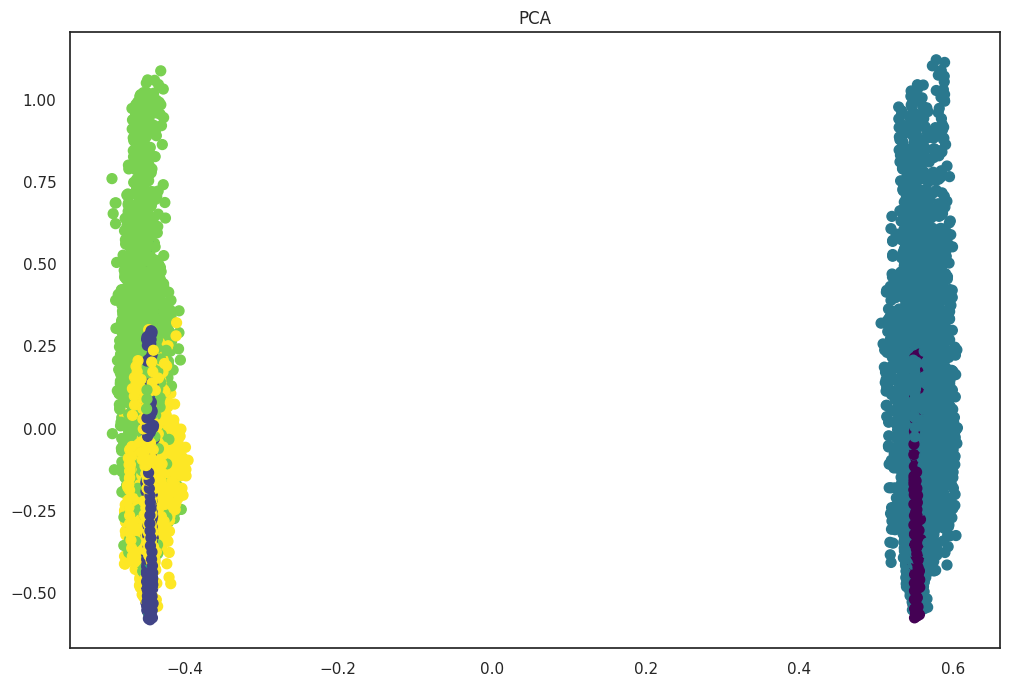

In [173]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=gm.predict(X), s=50, cmap='viridis')
plt.title('PCA')

In [174]:
print(f"\nSilhouette score: {metrics.silhouette_score(data_final, gm.predict(X))}\n") 


Silhouette score: 0.0047700933653044165

